<a href="https://colab.research.google.com/github/kdahun/bigdata2023/blob/main/dataAnalyze1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data.kma.go.kr 기온 데이터처리

In [4]:
import csv

In [5]:
# 데이터 불러오기
# csv파일의 주요 내용을 읽고 쓰는 모듈
\
f = open("/content/extremum_20230710100843.csv","r",encoding="cp949")
data=csv.reader(f,delimiter=",")
# next(data) # 제너레이터 이기 때문에 next로
f.close()

In [6]:
weather = []

with open("/content/extremum_20230710103848.csv","r",encoding="cp949") as fr:
  data=csv.reader(fr,delimiter=",")
  header = next(data)

  for i in data:
    weather.append(i)



In [7]:
print(header)
print(weather[0:2])

['\t\t지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '\t최고기온시각', '최저기온(℃)', '최저기온시각일교차', '']
[['\t\t140', '군산', '2000-01-01', '5.8', '9.6', '16:00', '2.1', '7:25', '7.5'], ['\t\t140', '군산', '2000-01-02', '6.1', '9', '9:03', '4.1', '23:57', '4.9']]


In [30]:
# 23년간 군산의 최고 기온 찾고 그때의 날짜 찾기

max=0
min=float(weather[0][6])
li_min=[]
li=[]
for w in weather:
  try:
    if max < float(w[4]):
      max=float(w[4])
      li.append(w)

    if min>float(w[6]):
      min=float(w[6])
      li_min.append(w)

  except ValueError:
    print(w)



['\t\t140', '군산', '2022-10-05', '', '', '', '', '', '']
['\t\t', '', '', '', '', '', '', '', '']
['\t', '', '', '', '', '', '', '', '']
['\t', '', '', '', '', '', '', '', '']
['\t', '', '', '', '', '', '', '', '']
['\t', '', '', '', '', '', '', '', '']
['\t\t', '', '', '', '', '', '', '', '']
['\t', '', '', '', '', '', '', '', '']
['\t', '', '', '', '', '', '', '', '']


In [31]:
li[-1]

['\t\t140', '군산', '2018-08-02', '30.7', '37.1', '14:34', '26.1', '4:27', '11']

In [33]:
print(li.pop())
print(li_min.pop())

['\t\t140', '군산', '2018-08-01', '30.4', '36.5', '13:30', '25.4', '5:28', '11.1']
['\t\t140', '군산', '2021-01-08', '-12.9', '-8.3', '16:08', '-16.8', '8:04', '8.5']


# 넘파이

In [36]:
import numpy as np
my_arr = np.arange(5)
my_arr

array([0, 1, 2, 3, 4])

In [37]:
my_arr = np.arange(100000)
%time for _ in range(10): my_arr2=my_arr*2

CPU times: user 2.55 ms, sys: 1.11 ms, total: 3.66 ms
Wall time: 4.82 ms


In [39]:
my_list = list(range(100000))
%time for _ in range(10): my_list2=my_list*2

CPU times: user 18.8 ms, sys: 0 ns, total: 18.8 ms
Wall time: 100 ms


In [58]:
data = np.random.randn(2,3)

In [66]:
print(type(data))
print(data.shape)
print(data.dtype)
print(data.ndim)

data

<class 'numpy.ndarray'>
(2, 3)
float64
2
48


array([[-2.36334046, -1.13347675, -0.14980022],
       [-0.90222767,  0.26837426,  0.46347804]])

In [81]:
data2 = [7,8,9,4,5,6,1,2,3]
arr1 = np.array(data2,dtype="float").reshape(3,3)

In [82]:
print(type(arr1))
print(arr1.shape)
print(arr1.dtype)
print(arr1.ndim)
arr1

<class 'numpy.ndarray'>
(3, 3)
float64
2


array([[7., 8., 9.],
       [4., 5., 6.],
       [1., 2., 3.]])

In [76]:
print(np.zeros(10))
print(np.ones((3,4,2)))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[[1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]]]


In [83]:
arr1 = np.array([1,2,3])
print(arr1.dtype)
arr1 = arr1.astype("float")
print(arr1.dtype)

int64
float64


In [85]:
numric_string = np.array(["1.23","-9.6","45"],dtype=np.string_)

In [86]:
numric_string.dtype

dtype('S4')

In [87]:
numric_string.astype("float")

array([ 1.23, -9.6 , 45.  ])

In [93]:
arr1
arr2= arr1*2
arr1>arr2

array([False, False, False])

In [93]:
arr = np.arange(10)
slice_arr = arr[3:6]
print(slice_arr)
slice_arr[:]=1000


In [104]:
arr3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
arr3d[0,1,1]

5

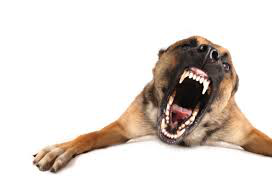

In [117]:
from PIL import Image

img = Image.open("/content/dog.jfif")
img.show()

In [118]:
img_arr=np.array(img)


print(img_arr.shape)
print(img_arr.ndim)

(185, 272, 3)
3


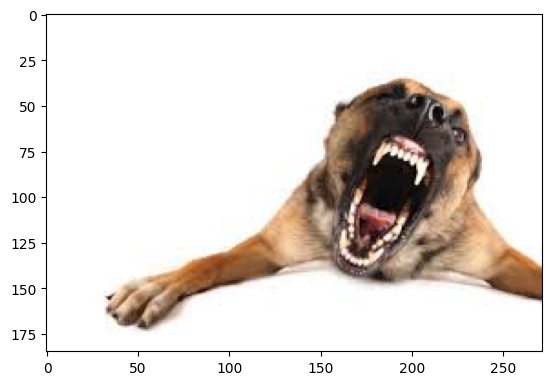

In [119]:
import matplotlib.pyplot as plt

plt.imshow(img_arr)
plt.show()

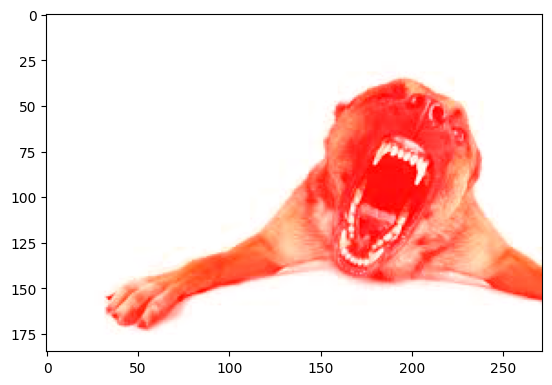

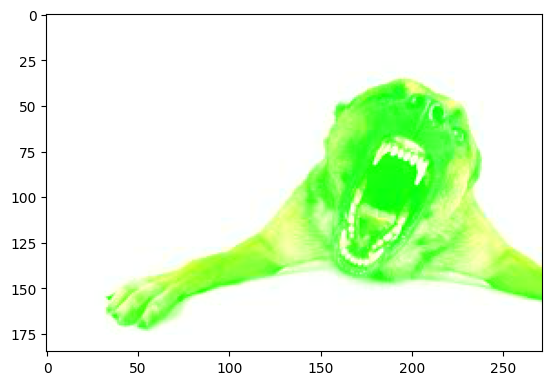

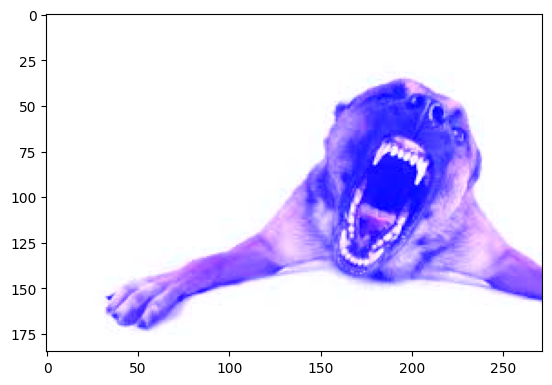

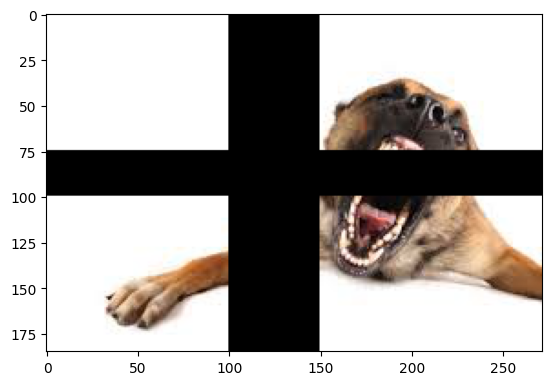

In [129]:
red_img = img_arr[::].copy()
red_img[:,:,0]=255
plt.imshow(red_img)
plt.show()

green_img = img_arr[::].copy()
green_img[:,:,1]=255
plt.imshow(green_img)
plt.show()

blue_img = img_arr[::].copy()
blue_img[:,:,2]=255
plt.imshow(blue_img)
plt.show()

line_img = img_arr[::].copy()
line_img[:,100:150,:]=0
line_img[75:100,:,:]=0

plt.imshow(line_img)
plt.show()


In [139]:
names = ["Bob","Joe","Will","Bob","Will","Joe","Joe"]
name_arr = np.array(names)

In [140]:
name_arr.dtype

dtype('<U4')

In [142]:
data = np.random.randn(7,4)
print(data)

array([[ 0.32234545, -0.32006228, -0.20308964,  0.06107892],
       [-0.36424061, -0.59289632, -2.59301284, -0.23083479],
       [-0.64432806,  0.97037715, -1.32937024, -1.09920349],
       [-0.99562636, -0.63905471,  1.37942177, -0.76609846],
       [-0.76884355,  0.18424586,  1.72186435, -0.8092836 ],
       [ 0.45225201, -0.62265859,  1.07595358, -0.62915201],
       [-0.76714218, -2.65491111, -0.122014  , -1.44665967]])

In [167]:
print(name_arr=="Bob")
print(name_arr=="Will")
print(name_arr=="Joe")
print((name_arr=="Bob")|(name_arr=="Will"))

[ True False False  True False False False]
[False False  True False  True False False]
[False  True False False False  True  True]
[ True False  True  True  True False False]


In [165]:
(print(data[name_arr=="Bob"])
print(data[name_arr=="Will"])
print()
print(data[name_arr!="Joe"])
print()
print(data[(name_arr=="Will") | (name_arr=="Bob")])
print()
print(data[np.logical_or(name_arr=="Will",name_arr=="Bob")])

[[ 0.32234545 -0.32006228 -0.20308964  0.06107892]
 [-0.99562636 -0.63905471  1.37942177 -0.76609846]]
[[-0.64432806  0.97037715 -1.32937024 -1.09920349]
 [-0.76884355  0.18424586  1.72186435 -0.8092836 ]]

[[ 0.32234545 -0.32006228 -0.20308964  0.06107892]
 [-0.64432806  0.97037715 -1.32937024 -1.09920349]
 [-0.99562636 -0.63905471  1.37942177 -0.76609846]
 [-0.76884355  0.18424586  1.72186435 -0.8092836 ]]

[[ 0.32234545 -0.32006228 -0.20308964  0.06107892]
 [-0.64432806  0.97037715 -1.32937024 -1.09920349]
 [-0.99562636 -0.63905471  1.37942177 -0.76609846]
 [-0.76884355  0.18424586  1.72186435 -0.8092836 ]]

[[ 0.32234545 -0.32006228 -0.20308964  0.06107892]
 [-0.64432806  0.97037715 -1.32937024 -1.09920349]
 [-0.99562636 -0.63905471  1.37942177 -0.76609846]
 [-0.76884355  0.18424586  1.72186435 -0.8092836 ]]


In [169]:
data[data>0]

array([0.32234545, 0.06107892, 0.97037715, 1.37942177, 0.18424586,
       1.72186435, 0.45225201, 1.07595358])

In [174]:
arr = np.empty((8,4))
for i in range(8):
  arr[i]=i
arr[arr>5]=5
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [5., 5., 5., 5.],
       [5., 5., 5., 5.]])

In [179]:
names_a = np.array(["Bob","Joe","Will","Bob","Will","Joe","Joe",""])
names_a[names_a==""]=None
names_a

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe', 'None'],
      dtype='<U4')

In [184]:
arr=np.arange(32).reshape(8,4)
arr[[5,4,1],[3,1,0]]

array([23, 17,  4])

In [188]:
a=np.array([[1,2,3],[1,2,3]])
b=np.array([[1,1],[2,2]])
np.dot(b,a)

array([[ 2,  4,  6],
       [ 4,  8, 12]])

In [189]:
dset={"영미":{"국어" : 80,"수학":90,"음악":100},
      "두현":{"국어" : 100,"수학":98,"음악":90},
      "준이":{"국어" : 95,"수학":93,"음악":92}}

weight=[1,1.2,2.0]



dict_keys(['영미', '두현', '준이'])

In [197]:
dset_list=[]
for name in dset.keys():
  dset_list.append(list(dset[name].values()))
dset_arr=np.array(dset_list)

In [207]:
student =[]
for i in dset_arr:
  student.append((i*weight).sum())

total_sum=(dset_arr*weight).sum(1)

print(total_sum.max())
print(total_sum.argmax())

397.6
1


In [201]:
student

[388.0, 397.6, 390.6]

In [215]:
# axis = 0은 y축 axis = 1은 x축

arr= np.random.randn(4,4)
print(arr)
print(arr.mean(axis=1))
print(arr.sum(axis=0))
print(arr.sum(axis=1))
print(arr.cumsum())

[[-2.23094769  0.01702638 -0.53429538  1.21548089]
 [-2.31730522 -0.47900659  0.42582816  0.34835205]
 [ 3.10025488 -2.34445018 -0.20687857  1.33216837]
 [ 0.13410986  1.39700648 -0.59703477  2.04253916]]
[-0.38318395 -0.5055329   0.47027362  0.74415518]
[-1.31388817 -1.40942392 -0.91238057  4.93854047]
[-1.53273579 -2.02213161  1.88109449  2.97662072]
[-2.23094769 -2.21392131 -2.74821669 -1.53273579 -3.85004101 -4.3290476
 -3.90321945 -3.5548674  -0.45461252 -2.7990627  -3.00594128 -1.67377291
 -1.53966305 -0.14265657 -0.73969135  1.30284781]


In [210]:
np.where(arr>0,arr,0)

array([[0.        , 0.4954042 , 0.        , 1.43470189],
       [0.        , 0.37920493, 0.        , 1.44799411],
       [0.        , 0.        , 1.75421347, 0.        ],
       [0.51014543, 0.        , 0.        , 1.0905183 ]])

In [236]:
arr = np.random.randint(0,100,size=101)
# 중앙값
arr.sort()
print(arr[len(arr)//2])

# 제 1 사분위 수
print(arr[len(arr)//4])

58
27


In [253]:

arr = np.random.randint(0,100,size=10000)
arr[arr==5].sum()//5

105

In [254]:
(arr==5).sum()

105

In [284]:
# 계단
arr=np.random.randint(0,2,size=100)

# 0일때는 가만히 1일 때는 1올라가는 상황에서 현재높이
(arr==1).sum()

53

In [285]:
# 0일때는 1 내려가고 1일 때는 1올라가는 상황에서 현재높이
(arr==1).sum()-(arr==0).sum()

6

In [286]:
# 0일때는 그대로 1일 때는 1올라가는 상황에서 가장 높게 올라간 높이
print(arr)
arr.cumsum()[-1]

[0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1
 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1
 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1]


53

In [287]:
# 0일때는 1 내려가고 1일 때는 1올라가는 상황에서 가장 높게 올라간 높이
np.where(arr==1,arr,-1).cumsum().max()

6

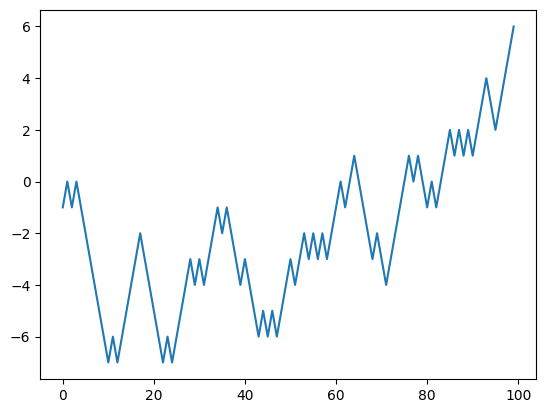

In [291]:
plt.plot(np.where(arr==1,arr,-1).cumsum())

# Pandas DataFrame 다루기

In [292]:
import pandas as pd
from pandas import Series, DataFrame

In [298]:
obj = pd.Series([4,7,-5,3],[4,3,2,1])
print(obj)
print(obj.values)
print(obj.index)

4    4
3    7
2   -5
1    3
dtype: int64
[ 4  7 -5  3]
Int64Index([4, 3, 2, 1], dtype='int64')


In [302]:
obj2 = pd.Series([4,7,-5,3],index=['d','b','a','c'])
print(obj2[obj2>=4])
print(obj2.values)


d    4
b    7
dtype: int64
[ 4  7 -5  3]
<bound method IndexOpsMixin.value_counts of d    4
b    7
a   -5
c    3
dtype: int64>


In [316]:
d={"Ohio":35000,"Texas":71000,"Oregon":16000,"Utah":5000}
obj3 = pd.Series(d,index=["Ohio","Texas","Utah","Oregon","California"])
obj3

Ohio          35000.0
Texas         71000.0
Utah           5000.0
Oregon        16000.0
California        NaN
dtype: float64

In [321]:
print("isnull : \n",pd.isnull(obj3))
print("\n notnull : \n",pd.notnull(obj3))

isnull : 
 Ohio          False
Texas         False
Utah          False
Oregon        False
California     True
dtype: bool

 notnull : 
 Ohio           True
Texas          True
Utah           True
Oregon         True
California    False
dtype: bool


In [329]:
# d={"Ohio":35000,"Texas":71000,"Oregon":16000,"Utah":5000}
data = {"state" : ["Ohio","Ohio","Ohio","Nebada","Nebada","Nebada"],"year" : [2000,2001,2002,2001,2002,2003],
        "pop":[1.5,1.7,3.6,2.4,2.9,3.2]}
pd.DataFrame(data)

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nebada,2001,2.4
4,Nebada,2002,2.9
5,Nebada,2003,3.2
